# Path analysis

In [4]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import os

#### Path setup

In [123]:
# Paths definition
home_path = '/home/usuario/'

datasets_path = os.path.join(home_path, 'project_data', 'datasets')
new_path = os.path.join(home_path, 'project_data', 'new_datasets')

all_datasets = ['KITTITrackletsCars', 'KITTITrackletsCarsPersons', 'KITTITrackletsCarsHard', 'KITTITrackletsCarsPersonsHard']

dataset_path = os.path.join(datasets_path, all_datasets[1])

In [6]:
# Util to load json
def read_paths(filepath):
    """ Read path json file from filepath """
    with open(filepath) as file:
        name_cont = json.load(file)
    return name_cont

In [273]:
# Load path dictionary
path_cont = read_paths(os.path.join(datasets_path, all_datasets[1], "paths.json"))
# Load information on the different trajectories
eval_info = pd.read_csv(os.path.join(datasets_path, all_datasets[1], "info_eval.csv"))
train_info = pd.read_csv(os.path.join(datasets_path, all_datasets[1], "info_train.csv"))
all_info = pd.read_csv(os.path.join(datasets_path, all_datasets[1], "info_all.csv"))

# Load prediction from NN
predictions = pd.read_csv(os.path.join(datasets_path, all_datasets[1], "NN_output.csv"))


#### Verification of the generated paths

In [110]:
def test_existing_paths(path_dict, path_info):
    """ Compares if both the path dictionary and the path information csv have the same observations 
        The path dictionary contains in explicit format the full observation number, instead the 
        path csv contains a codified expression (first_point + n_points). So this function generates
        the full list of observations based on the coded expression and checks if it is the same.
        Params:
        - path_dict: (dict) containing the path name (string) (seq_track) as key and a list with all
        the different names
        - path_info: (pd.DataFrame) with different info on the paths
        Returns:
        - Boolean: if true it is correct if not not.
    """
    # Pass to list of names
    names1 = list(path_dict.keys())
    names2 = list(path_info['name'].values)
    
    # Check if all the eval are the same
    if (names1 != names2):
        return False
    
    for i in range(len(names1)):
        # Observations from dictionary
        individual_obs = path_dict[names1[i]]
        
        # Observations from the csv
        info_obs = path_info.iloc[i] # Read CSV
        synth_obs = generate_names(info_obs)
        
        if individual_obs != synth_obs:
            print(f"Path {names1[i]} not correct")
            return False
    
    
    return True

In [116]:
def generate_names(info_obs):
    """ Generates list of names given route info """
    return [str(i).zfill(8) for i in range(info_obs['first_point'], info_obs['first_point']+info_obs['n_points'])]

In [119]:
# This tests that everything is working correctly
test_existing_paths(path_cont, all_info)

True

#### Load utils

In [171]:
def to_arr(value):
    """ Converts a string with float values to an actual list of floats """
    return [float(name) for name in value.split()]

def fix_meta(meta):
    """ Converts all the string coded values to lists """
    meta['start_position'] = to_arr(meta['start_position'])
    meta['end_position'] = to_arr(meta['end_position'])
    meta['translation'] = to_arr(meta['translation'])

In [172]:
def load_single_path(dataset_path, names):
    container = list()
    for name in names:
        file_path = os.path.join(dataset_path, 'meta', f"{name}.json")
        with open(file_path) as json_file: observation = json.load(json_file)
        fix_meta(observation)
        container.append(observation)

    return container

#### Routes visualization

In [335]:
def plot_route_meta(metas):
    """ Plots routes from meta files """
    positions_s = {'x':[], 'y':[]}
    for obs in metas:
        positions_s['x'].append(obs['start_position'][0])
        positions_s['y'].append(obs['start_position'][1])
    positions_e = {'x':[], 'y':[]}
    for obs in metas:
        positions_e['x'].append(obs['end_position'][0])
        positions_e['y'].append(obs['end_position'][1])

    plt.plot(positions_s['x'], positions_s['y'], 'o',color='black')
    plt.plot(positions_e['x'], positions_e['y'], 'o', color='orange')
    plt.show()

In [336]:
i = 100

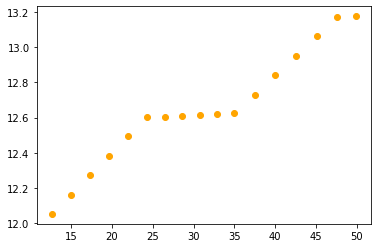

In [340]:
names = generate_names(eval_info.iloc[i])
metas = load_single_path(dataset_path, names)
plot_route_meta(metas)
i += 1

In [274]:
train_info

,name,type,first_point,n_points,cumsum
0,0_0,T,0,153,0
1,0_2,T,153,5,153
2,0_3,T,158,109,158
3,0_4,T,267,34,267
4,0_5,T,301,7,301
...,...,...,...,...,...
556,20_129,T,28401,18,28401
557,20_130,T,28419,3,28419
558,20_131,T,28422,3,28422
559,20_132,T,28425,12,28425


In [272]:
eval_info['cumsum'] = np.concatenate(([0],eval_info['n_points'].cumsum().values))[:-1]
